# **Assignment 2**
---





# 1- Auto Encoder

Get Data Set from Uploaded data from github

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory
_URL = 'https://raw.githubusercontent.com/KhaledGhaleb/CorelDataSet/main/CORELREduced.zip'
path_to_zip = tf.keras.utils.get_file('COREL-REduced.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'COREL-REduced')

2220032/2215519 [==============================] - 0s 0us/step


Create Train and validation data set by ratio of 0.25 validation = 20 * 0.5 = 5 validation 

In [ ]:
BATCH_SIZE = 128
IMG_SIZE = (100, 100)
COLOR_MODE = 'rgb' #"grayscale"  #  "rgb"
Color_Num = 3

train_dataset = image_dataset_from_directory(PATH,
                                             seed = 1234,                                           
                                             color_mode = COLOR_MODE, 
                                             validation_split = 0.25,
                                             subset = "training",
                                             image_size=IMG_SIZE,
                                             batch_size=BATCH_SIZE,
                                             label_mode ='categorical',
                                             )
Validation_dataset = image_dataset_from_directory(PATH,
                                             seed = 1234,                                           
                                             color_mode = COLOR_MODE, 
                                             validation_split = 0.25,
                                             subset = 'validation',
                                             image_size=IMG_SIZE,
                                             batch_size=BATCH_SIZE,
                                             label_mode ='categorical',
                                             )
                                             

Found 80 files belonging to 4 classes.
Using 60 files for training.
Found 80 files belonging to 4 classes.
Using 20 files for validation.


Plot random images from data set and print class label above

Normalize data set

In [ ]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
#reshape_layer = tf.keras.layers.Reshape(3, 4)
train_normalized_ds = train_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_normalized_ds = Validation_dataset.map(lambda x, y: (normalization_layer(x), y))

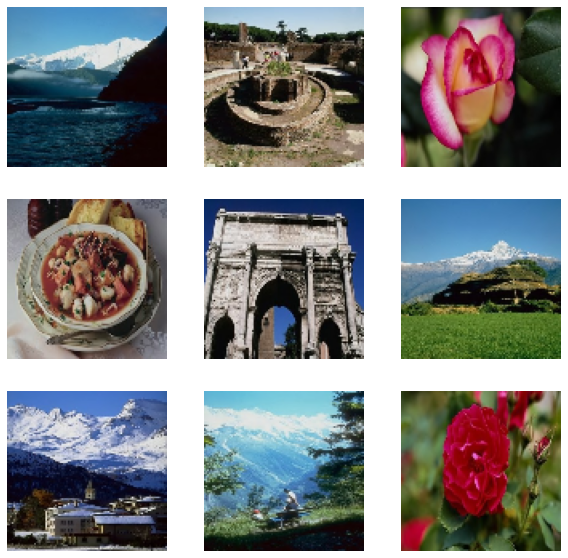

In [ ]:
plt.figure(figsize=(10, 10))
class_names = train_dataset.class_names
for images, labels in train_normalized_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.axis("off")

Convert normalized dataset to images and labels in nparray 

In [ ]:
train_images,train_labels  = list(train_normalized_ds.as_numpy_iterator())[0]
validate_images,validate_labels  = list(validation_normalized_ds.as_numpy_iterator())[0]
# for images, labels in train_normalized_ds.as_numpy_iterator():
#     validate_images = images
#     validate_labels = labels

Preapre first autoencoder stage

In [ ]:
#@title
import keras
from keras import layers
from keras import regularizers
from keras.regularizers import l1,l2

Input_size = IMG_SIZE[1]* IMG_SIZE[0] * Color_Num # color
# This is the size of our encoded representations
compression = 4
ll1 = 0
ll2 =0
negative_relu_slope = 1.0
encoding_dim_1 =  IMG_SIZE[0]*IMG_SIZE[1]*3/compression  # 100 * 100 * /2 floats -> compression of factor 2

# This is our input image
input_img_1 = keras.Input(shape=(IMG_SIZE[0],IMG_SIZE[1],Color_Num))
flatten_1 = layers.Flatten()(input_img_1)
# "encoded" is the encoded representation of the input
encoded_1 = layers.Dense(encoding_dim_1, activation=tf.keras.layers.ReLU(negative_slope=negative_relu_slope),
                         kernel_regularizer=l2(ll2),
                         bias_regularizer=l2(ll2))(flatten_1)
# "decoded" is the lossy reconstruction of the input
decoded_1 = layers.Dense(Input_size, activation='linear')(encoded_1)
decoded_1 = layers.Reshape((IMG_SIZE[0],IMG_SIZE[1],Color_Num))(decoded_1)
# This model maps an input to its reconstruction
autoencoder_1 = keras.Model(input_img_1, decoded_1)

autoencoder_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense (Dense)                (None, 7500)              225007500 
_________________________________________________________________
dense_1 (Dense)              (None, 30000)             225030000 
_________________________________________________________________
reshape (Reshape)            (None, 100, 100, 3)       0         
Total params: 450,037,500
Trainable params: 450,037,500
Non-trainable params: 0
_________________________________________________________________


Encoder Model

In [ ]:
# This model maps an input to its encoded representation
encoder_1 = keras.Model(input_img_1, encoded_1)

Decoder Model

In [ ]:
# This is our encoded (32-dimensional) input
#encoded_input_1 = keras.Input(shape=(int(encoding_dim_1),))
# Retrieve the last layer of the autoencoder model
#decoder_layer_1 = autoencoder_1.layers[-1]
# Create the decoder model
#decoder_1 = keras.Model(encoded_input_1, decoder_layer_1(encoded_input_1))

Complie First autoencoder 

In [ ]:


#autoencoder_1.compile(optimizer='adam', loss='mean_squared_error',metrics= ['accuracy'])
#autoencoder_1.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(),metrics= ['accuracy'])
#save weight to ompare after 
autoencoder_1.save_weights('autoencoder_1.h5') 

In [ ]:
#try
#autoencoder_1.load_weights('autoencoder_1.h5')
#autoencoder_1.fit(x= train_images, y= train_images,
#                epochs=100,
#                batch_size=10,
#                shuffle=True,
#                validation_data=(validate_images,validate_images))

In [ ]:

autoencoder_1.compile(optimizer= "adam", loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics= ['accuracy'])
#autoencoder_1.compile(optimizer= tf.keras.optimizers.SGD(learning_rate=0.05, momentum=0.95), loss=tf.keras.losses.MeanSquaredError(),metrics= ['accuracy'])
autoencoder_1.save_weights('autoencoder_1.h5') 

autoencoder_1.load_weights('autoencoder_1.h5')
autoencoder_1.fit(x= train_images, y= train_images,
                epochs=50,
                batch_size=10,
                shuffle=True,
                validation_data=(validate_images,validate_images))

Epoch 1/50
6/6 [==============================] - 5s 216ms/step - loss: 5.8559 - accuracy: 0.3705 - val_loss: 7.0408 - val_accuracy: 0.4085
Epoch 2/50
6/6 [==============================] - 1s 140ms/step - loss: 5.3023 - accuracy: 0.3884 - val_loss: 3.6150 - val_accuracy: 0.3446
Epoch 3/50
6/6 [==============================] - 1s 139ms/step - loss: 3.1766 - accuracy: 0.3763 - val_loss: 1.4104 - val_accuracy: 0.4505
Epoch 4/50
6/6 [==============================] - 1s 139ms/step - loss: 1.6997 - accuracy: 0.4471 - val_loss: 1.0636 - val_accuracy: 0.4536
Epoch 5/50
6/6 [==============================] - 1s 139ms/step - loss: 1.3325 - accuracy: 0.4518 - val_loss: 1.0736 - val_accuracy: 0.4110
Epoch 6/50
6/6 [==============================] - 1s 140ms/step - loss: 1.1058 - accuracy: 0.4192 - val_loss: 0.8239 - val_accuracy: 0.4533
Epoch 7/50
6/6 [==============================] - 1s 139ms/step - loss: 0.9717 - accuracy: 0.4526 - val_loss: 1.3543 - val_accuracy: 0.4211
Epoch 8/50
6/6 [====

Plot Images predict vs original in train and validation data set

1.0
4.122649
1.0
1.0
4.1869025
1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

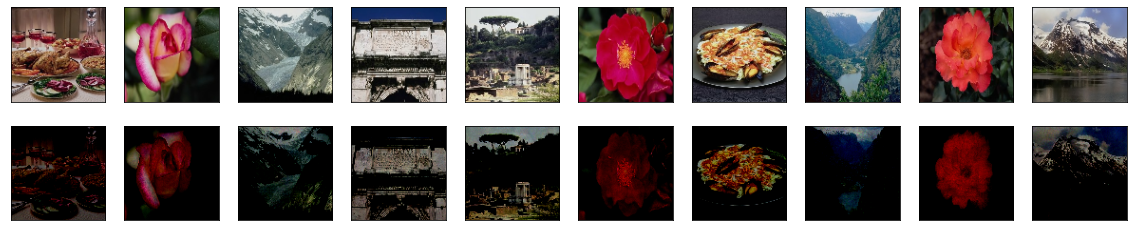

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

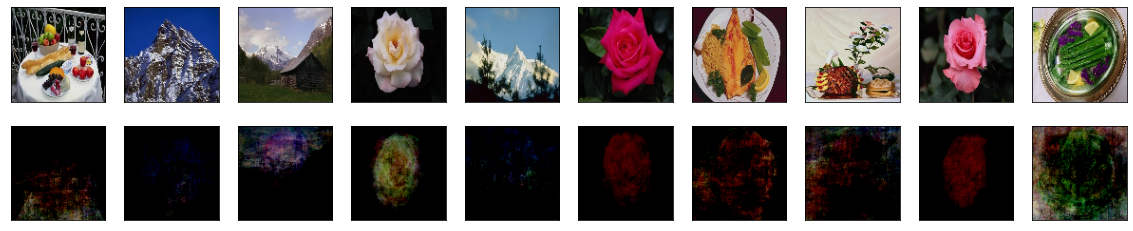

In [ ]:
# decode train Images

print(np.amax(train_images))
train_decoded_imgs_1 = autoencoder_1.predict(train_images) 
print(np.amax(train_decoded_imgs_1))
train_decoded_imgs_1 = train_decoded_imgs_1 / np.amax(train_decoded_imgs_1) 
print(np.amax(train_decoded_imgs_1))

# Encode and decode
# Note that we take them from the *test* set

print(np.amax(validate_images))
validate_decoded_imgs_1 = autoencoder_1.predict(validate_images) 
print(np.amax(validate_decoded_imgs_1))
validate_decoded_imgs_1 = validate_decoded_imgs_1 / np.amax(validate_decoded_imgs_1) 
print(np.amax(validate_decoded_imgs_1))

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(train_images[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(train_decoded_imgs_1[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(validate_images[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(validate_decoded_imgs_1[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Second Hidden Layer

In [ ]:
#Input_size = IMG_SIZE[1]* IMG_SIZE[0] * Color_Num # color
# This is the size of our encoded representations
compression = 4
ll1 = 0
ll2 =0
negative_relu_slope = 1.0
encoding_dim_2 =  encoding_dim_1/compression  # 100 * 100 * /2 floats -> compression of factor 2

# This is our input image
input_img_2 = keras.Input(shape=(int(encoding_dim_1),))
#flatten_1 = layers.Flatten()(input_img_1)
# "encoded" is the encoded representation of the input
encoded_2 = layers.Dense(encoding_dim_2, activation=tf.keras.layers.ReLU(negative_slope=negative_relu_slope),
                         kernel_regularizer=l2(ll2),
                         bias_regularizer=l2(ll2))(input_img_2)
# "decoded" is the lossy reconstruction of the input
decoded_2 = layers.Dense(Input_size, activation='linear')(encoded_2)
decoded_2 = layers.Reshape((IMG_SIZE[0],IMG_SIZE[1],Color_Num))(decoded_2)
# This model maps an input to its reconstruction
autoencoder_2 = keras.Model(input_img_2, decoded_2)

autoencoder_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 7500)]            0         
_________________________________________________________________
dense_2 (Dense)              (None, 1875)              14064375  
_________________________________________________________________
dense_3 (Dense)              (None, 30000)             56280000  
_________________________________________________________________
reshape_1 (Reshape)          (None, 100, 100, 3)       0         
Total params: 70,344,375
Trainable params: 70,344,375
Non-trainable params: 0
_________________________________________________________________


Encoder Model

In [ ]:
# This model maps an input to its encoded representation
encoder_2 = keras.Model(input_img_2, encoded_2)

Compile and Fit second hidden layer with output stage original image


In [ ]:
autoencoder_2.compile(optimizer= "adam", loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics= ['accuracy'])
autoencoder_2.save_weights('autoencoder_2.h5')

# Note that we take them from the *test* set
train_encoded_imgs_1 = encoder_1.predict(train_images)
validate_encoded_imgs_1 = encoder_1.predict(validate_images)
#autoencoder_1.compile(optimizer= tf.keras.optimizers.SGD(learning_rate=0.05, momentum=0.95), loss=tf.keras.losses.MeanSquaredError(),metrics= ['accuracy'])
autoencoder_2.load_weights('autoencoder_2.h5')
autoencoder_2.fit(x= train_encoded_imgs_1, y= train_images,
                epochs=50,
                batch_size=10,
                shuffle=True,
                validation_data=(validate_encoded_imgs_1,validate_images))

Epoch 1/50
6/6 [==============================] - 1s 51ms/step - loss: 0.7144 - accuracy: 0.3776 - val_loss: 0.7518 - val_accuracy: 0.4610
Epoch 2/50
6/6 [==============================] - 0s 27ms/step - loss: 0.7655 - accuracy: 0.5063 - val_loss: 0.6475 - val_accuracy: 0.4802
Epoch 3/50
6/6 [==============================] - 0s 26ms/step - loss: 0.7048 - accuracy: 0.4867 - val_loss: 0.7142 - val_accuracy: 0.5056
Epoch 4/50
6/6 [==============================] - 0s 25ms/step - loss: 0.6762 - accuracy: 0.5540 - val_loss: 0.6720 - val_accuracy: 0.5304
Epoch 5/50
6/6 [==============================] - 0s 25ms/step - loss: 0.6506 - accuracy: 0.5501 - val_loss: 0.6423 - val_accuracy: 0.5287
Epoch 6/50
6/6 [==============================] - 0s 25ms/step - loss: 0.5999 - accuracy: 0.5511 - val_loss: 0.6198 - val_accuracy: 0.5410
Epoch 7/50
6/6 [==============================] - 0s 25ms/step - loss: 0.5717 - accuracy: 0.6001 - val_loss: 0.5993 - val_accuracy: 0.5404
Epoch 8/50
6/6 [===========

Plot Images predict vs original in train and validation data set

1.0
(60, 100, 100, 3)
8.528748
1.0
1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5.09971
1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


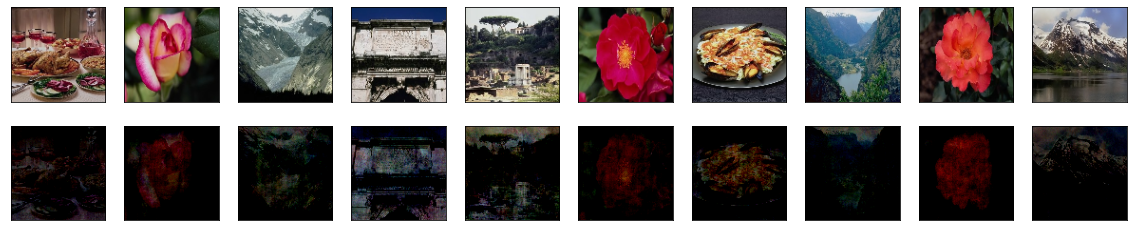

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

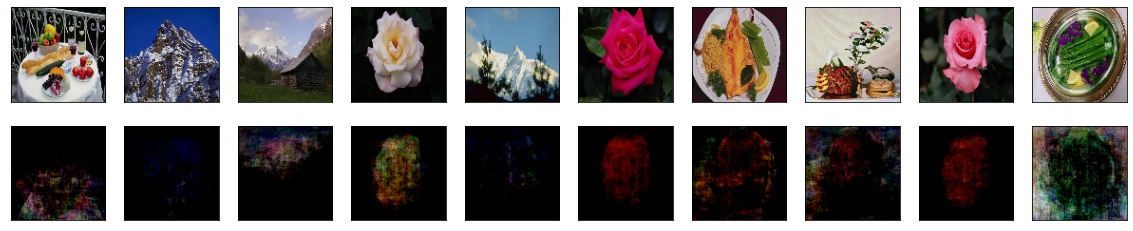

In [ ]:
# decode train Images

print(np.amax(train_decoded_imgs_1))
print(train_decoded_imgs_1.shape)
train_decoded_imgs_2= autoencoder_2.predict(train_encoded_imgs_1) 
print(np.amax(train_decoded_imgs_2))
train_decoded_imgs_2 = train_decoded_imgs_2 / np.amax(train_decoded_imgs_2) 
print(np.amax(train_decoded_imgs_2))

# Encode and decode
# Note that we take them from the *test* set

print(np.amax(validate_decoded_imgs_1))
validate_decoded_imgs_2 = autoencoder_2.predict(validate_encoded_imgs_1) 
print(np.amax(validate_decoded_imgs_2))
validate_decoded_imgs_2 = validate_decoded_imgs_2 / np.amax(validate_decoded_imgs_2) 
print(np.amax(validate_decoded_imgs_2))

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(train_images[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(train_decoded_imgs_2[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(validate_images[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(validate_decoded_imgs_2[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Third Hidden Layer

In [ ]:
#Input_size = IMG_SIZE[1]* IMG_SIZE[0] * Color_Num # color
# This is the size of our encoded representations
compression = 4
ll1 = 0
ll2 =0
negative_relu_slope = 1.0
encoding_dim_3 =  encoding_dim_2/compression  # 100 * 100 * /2 floats -> compression of factor 2

# This is our input image
input_img_3 = keras.Input(shape=(int(encoding_dim_2),))
#flatten_1 = layers.Flatten()(input_img_1)
# "encoded" is the encoded representation of the input
encoded_3 = layers.Dense(encoding_dim_3, activation=tf.keras.layers.ReLU(negative_slope=negative_relu_slope),
                         kernel_regularizer=l2(ll2),
                         bias_regularizer=l2(ll2))(input_img_3)
# "decoded" is the lossy reconstruction of the input
decoded_3 = layers.Dense(Input_size, activation='linear')(encoded_3)
decoded_3 = layers.Reshape((IMG_SIZE[0],IMG_SIZE[1],Color_Num))(decoded_3)
# This model maps an input to its reconstruction
autoencoder_3 = keras.Model(input_img_3, decoded_3)

autoencoder_3.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1875)]            0         
_________________________________________________________________
dense_4 (Dense)              (None, 468)               877968    
_________________________________________________________________
dense_5 (Dense)              (None, 30000)             14070000  
_________________________________________________________________
reshape_2 (Reshape)          (None, 100, 100, 3)       0         
Total params: 14,947,968
Trainable params: 14,947,968
Non-trainable params: 0
_________________________________________________________________


Encoder Model

In [ ]:
# This model maps an input to its encoded representation
encoder_3 = keras.Model(input_img_3, encoded_3)

Compile and Fit third hidden layer with output stage original image

In [ ]:

autoencoder_3.compile(optimizer= "adam", loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics= ['accuracy'])
autoencoder_3.save_weights('autoencoder_3.h5')
# Note that we take them from the *test* set
train_encoded_imgs_2 = encoder_2.predict(train_encoded_imgs_1)
validate_encoded_imgs_2 = encoder_2.predict(validate_encoded_imgs_1)
#autoencoder_1.compile(optimizer= tf.keras.optimizers.SGD(learning_rate=0.05, momentum=0.95), loss=tf.keras.losses.MeanSquaredError(),metrics= ['accuracy'])
autoencoder_3.load_weights('autoencoder_3.h5')
autoencoder_3.fit(x= train_encoded_imgs_2, y= train_images,
                epochs=50,
                batch_size=10,
                shuffle=True,
                validation_data=(validate_encoded_imgs_2,validate_images))

Epoch 1/50
6/6 [==============================] - 1s 35ms/step - loss: 0.6801 - accuracy: 0.3794 - val_loss: 0.5921 - val_accuracy: 0.5449
Epoch 2/50
6/6 [==============================] - 0s 12ms/step - loss: 0.5714 - accuracy: 0.5786 - val_loss: 0.6022 - val_accuracy: 0.5676
Epoch 3/50
6/6 [==============================] - 0s 12ms/step - loss: 0.5576 - accuracy: 0.6254 - val_loss: 0.5693 - val_accuracy: 0.5962
Epoch 4/50
6/6 [==============================] - 0s 14ms/step - loss: 0.5357 - accuracy: 0.6195 - val_loss: 0.5656 - val_accuracy: 0.5763
Epoch 5/50
6/6 [==============================] - 0s 13ms/step - loss: 0.5159 - accuracy: 0.6522 - val_loss: 0.5706 - val_accuracy: 0.5635
Epoch 6/50
6/6 [==============================] - 0s 12ms/step - loss: 0.5123 - accuracy: 0.7083 - val_loss: 0.5697 - val_accuracy: 0.5808
Epoch 7/50
6/6 [==============================] - 0s 11ms/step - loss: 0.4973 - accuracy: 0.7336 - val_loss: 0.5678 - val_accuracy: 0.5822
Epoch 8/50
6/6 [===========

Plot Images predict vs original in train and validation data set

45.546303
4.6596494
1.0
38.091682


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3.8182418
1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


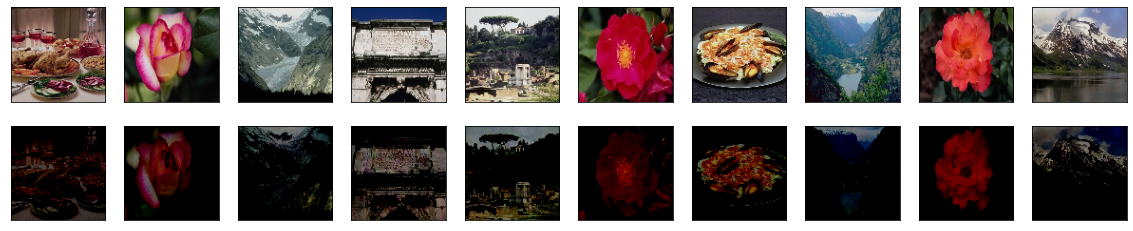

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

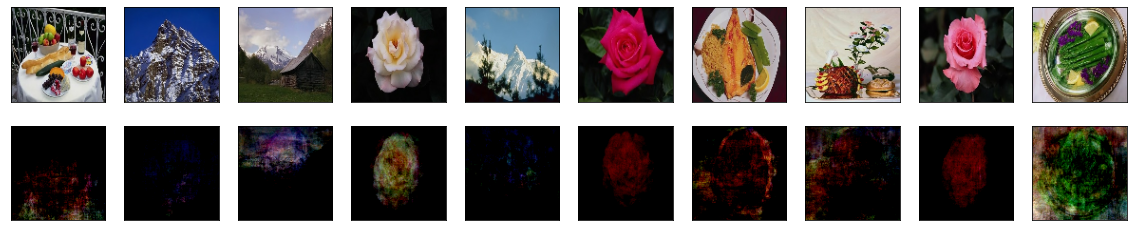

In [ ]:
# decode train Images

print(np.amax(train_encoded_imgs_2))
train_decoded_imgs_3= autoencoder_3.predict(train_encoded_imgs_2) 
print(np.amax(train_decoded_imgs_3))
train_decoded_imgs_3 = train_decoded_imgs_3 / np.amax(train_decoded_imgs_3) 
print(np.amax(train_decoded_imgs_3))

# Encode and decode
# Note that we take them from the *test* set

print(np.amax(validate_encoded_imgs_2))
validate_decoded_imgs_3 = autoencoder_3.predict(validate_encoded_imgs_2) 
print(np.amax(validate_decoded_imgs_3))
validate_decoded_imgs_3 = validate_decoded_imgs_3 / np.amax(validate_decoded_imgs_3) 
print(np.amax(validate_decoded_imgs_3))

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(train_images[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(train_decoded_imgs_3[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(validate_images[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(validate_decoded_imgs_3[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Forth Hidden Layer

In [ ]:
#Input_size = IMG_SIZE[1]* IMG_SIZE[0] * Color_Num # color
# This is the size of our encoded representations
compression = 2
ll1 = 0
ll2 =0
negative_relu_slope = 1.0
encoding_dim_4 =  encoding_dim_3/compression  # 100 * 100 * /2 floats -> compression of factor 2

# This is our input image
input_img_4 = keras.Input(shape=(int(encoding_dim_3),))
#flatten_1 = layers.Flatten()(input_img_1)
# "encoded" is the encoded representation of the input
encoded_4 = layers.Dense(encoding_dim_4, activation=tf.keras.layers.ReLU(negative_slope=negative_relu_slope),
                         kernel_regularizer=l2(ll2),
                         bias_regularizer=l2(ll2))(input_img_4)
# "decoded" is the lossy reconstruction of the input
decoded_4 = layers.Dense(Input_size, activation='linear')(encoded_4)
decoded_4 = layers.Reshape((IMG_SIZE[0],IMG_SIZE[1],Color_Num))(decoded_4)
# This model maps an input to its reconstruction
autoencoder_4 = keras.Model(input_img_4, decoded_4)

autoencoder_4.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 468)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 234)               109746    
_________________________________________________________________
dense_7 (Dense)              (None, 30000)             7050000   
_________________________________________________________________
reshape_3 (Reshape)          (None, 100, 100, 3)       0         
Total params: 7,159,746
Trainable params: 7,159,746
Non-trainable params: 0
_________________________________________________________________


Encoder Model

In [ ]:
# This model maps an input to its encoded representation
encoder_4 = keras.Model(input_img_4, encoded_4)

Compile and Fit third hidden layer with output stage original image

In [ ]:

autoencoder_4.compile(optimizer= "adam", loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics= ['accuracy'])
autoencoder_4.save_weights('autoencoder_3.h5')
# Note that we take them from the *test* set
train_encoded_imgs_3 = encoder_3.predict(train_encoded_imgs_2)
validate_encoded_imgs_3 = encoder_3.predict(validate_encoded_imgs_2)
#autoencoder_1.compile(optimizer= tf.keras.optimizers.SGD(learning_rate=0.05, momentum=0.95), loss=tf.keras.losses.MeanSquaredError(),metrics= ['accuracy'])
autoencoder_4.load_weights('autoencoder_3.h5')
autoencoder_4.fit(x= train_encoded_imgs_3, y= train_images,
                epochs=50,
                batch_size=10,
                shuffle=True,
                validation_data=(validate_encoded_imgs_3,validate_images))

Epoch 1/50
6/6 [==============================] - 1s 32ms/step - loss: 0.6854 - accuracy: 0.3767 - val_loss: 0.5988 - val_accuracy: 0.5245
Epoch 2/50
6/6 [==============================] - 0s 10ms/step - loss: 0.5758 - accuracy: 0.5584 - val_loss: 0.5685 - val_accuracy: 0.5633
Epoch 3/50
6/6 [==============================] - 0s 10ms/step - loss: 0.5477 - accuracy: 0.5909 - val_loss: 0.5670 - val_accuracy: 0.5759
Epoch 4/50
6/6 [==============================] - 0s 9ms/step - loss: 0.5254 - accuracy: 0.6409 - val_loss: 0.5700 - val_accuracy: 0.5923
Epoch 5/50
6/6 [==============================] - 0s 9ms/step - loss: 0.5179 - accuracy: 0.7174 - val_loss: 0.5647 - val_accuracy: 0.5870
Epoch 6/50
6/6 [==============================] - 0s 9ms/step - loss: 0.5012 - accuracy: 0.7023 - val_loss: 0.5623 - val_accuracy: 0.5868
Epoch 7/50
6/6 [==============================] - 0s 9ms/step - loss: 0.5055 - accuracy: 0.7297 - val_loss: 0.5653 - val_accuracy: 0.5911
Epoch 8/50
6/6 [===============

Plot Images predict vs original in train and validation data set

29.744808
5.0911655
1.0
20.831173


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1.0
1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


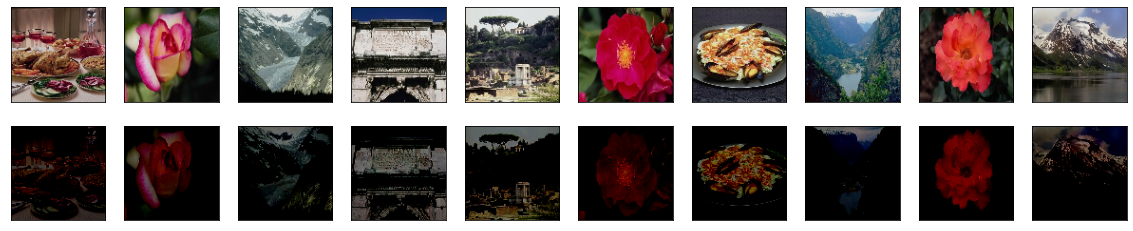

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

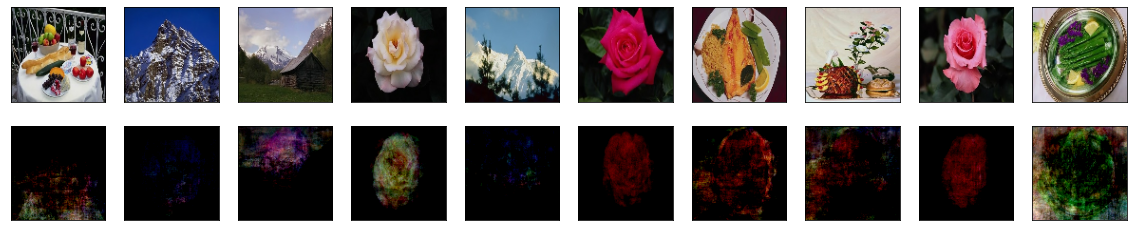

In [ ]:
# decode train Images

print(np.amax(train_encoded_imgs_3))
train_decoded_imgs_4= autoencoder_4.predict(train_encoded_imgs_3) 
print(np.amax(train_decoded_imgs_4))
train_decoded_imgs_4 = train_decoded_imgs_4 / np.amax(train_decoded_imgs_4) 
print(np.amax(train_decoded_imgs_4))

# Encode and decode
# Note that we take them from the *test* set

print(np.amax(validate_encoded_imgs_3))
validate_decoded_imgs_4 = autoencoder_4.predict(validate_encoded_imgs_3) 
print(np.amax(validate_decoded_imgs_3))
validate_decoded_imgs_4 = validate_decoded_imgs_4 / np.amax(validate_decoded_imgs_4) 
print(np.amax(validate_decoded_imgs_4))

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(train_images[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(train_decoded_imgs_4[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(validate_images[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(validate_decoded_imgs_4[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Prepare Final model with Soft Max layer


In [ ]:
input_img_final = keras.Input(shape=(IMG_SIZE[0],IMG_SIZE[1],Color_Num))
encoder_hidden_1 = encoder_1(input_img_final)
encoder_hidden_2 = encoder_2(encoder_hidden_1)
encoder_hidden_3 = encoder_3(encoder_hidden_2)
encoder_hidden_4 = encoder_4(encoder_hidden_3)
SoftmaxLayer     = layers.Dense(4, activation="softmax")(encoder_hidden_4)
autoencoder_final = keras.Model(input_img_final,SoftmaxLayer)
autoencoder_final.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
model_1 (Functional)         (None, 7500)              225007500 
_________________________________________________________________
model_3 (Functional)         (None, 1875)              14064375  
_________________________________________________________________
model_5 (Functional)         (None, 468)               877968    
_________________________________________________________________
model_7 (Functional)         (None, 234)               109746    
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 940       
Total params: 240,060,529
Trainable params: 240,060,529
Non-trainable params: 0
_____________________________________________

Compile

In [ ]:
autoencoder_final.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Fit


In [ ]:
#print(train_images.shape)
#print(train_labels.shape)
#print(validate_images.shape)
#print(validate_labels.shape)
#print(train_labels)
autoencoder_final.fit(x= train_images, y= train_labels,
                epochs=50,
                batch_size=10,
                shuffle=True,
                validation_data=(validate_images,validate_labels))

Epoch 1/50
6/6 [==============================] - 2s 128ms/step - loss: 1085.3040 - accuracy: 0.4274 - val_loss: 1031.2756 - val_accuracy: 0.2000
Epoch 2/50
6/6 [==============================] - 1s 96ms/step - loss: 698.9288 - accuracy: 0.3738 - val_loss: 628.5716 - val_accuracy: 0.3000
Epoch 3/50
6/6 [==============================] - 1s 96ms/step - loss: 489.2874 - accuracy: 0.4731 - val_loss: 239.4119 - val_accuracy: 0.6000
Epoch 4/50
6/6 [==============================] - 1s 96ms/step - loss: 269.6932 - accuracy: 0.5810 - val_loss: 332.1248 - val_accuracy: 0.6000
Epoch 5/50
6/6 [==============================] - 1s 96ms/step - loss: 396.9249 - accuracy: 0.7076 - val_loss: 104.0543 - val_accuracy: 0.7000
Epoch 6/50
6/6 [==============================] - 1s 97ms/step - loss: 109.6847 - accuracy: 0.5614 - val_loss: 137.9729 - val_accuracy: 0.8000
Epoch 7/50
6/6 [==============================] - 1s 95ms/step - loss: 94.3706 - accuracy: 0.7352 - val_loss: 199.9665 - val_accuracy: 0.60

In [ ]:
scores = autoencoder_final.evaluate(validate_images,validate_labels, verbose=1) 
print("Accuracy: ", scores[1])

1/1 [==============================] - 0s 137ms/step - loss: 62.1139 - accuracy: 0.7000
Accuracy:  0.699999988079071


# 2- CNN

# Build CNN Model

In [ ]:
CNN_model = keras.Sequential(
    [
        keras.Input(shape=((IMG_SIZE[0],IMG_SIZE[1],Color_Num))),
        layers.Conv2D(32, kernel_size=(3, 3), strides=2, padding="same",activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(4, activation="softmax"),
    ]
)

CNN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0

# Compile and Fit CNN

In [ ]:
CNN_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

CNN_model.fit(x= train_images, y= train_labels,
                epochs=50,
                batch_size=10,
                shuffle=True,
                validation_data=(validate_images,validate_labels))

Epoch 1/50
6/6 [==============================] - 30s 38ms/step - loss: 1.4030 - accuracy: 0.3195 - val_loss: 1.3566 - val_accuracy: 0.3000
Epoch 2/50
6/6 [==============================] - 0s 11ms/step - loss: 1.2586 - accuracy: 0.4388 - val_loss: 1.2875 - val_accuracy: 0.3000
Epoch 3/50
6/6 [==============================] - 0s 11ms/step - loss: 1.0846 - accuracy: 0.5248 - val_loss: 1.0412 - val_accuracy: 0.5500
Epoch 4/50
6/6 [==============================] - 0s 11ms/step - loss: 0.8728 - accuracy: 0.6586 - val_loss: 1.0564 - val_accuracy: 0.5000
Epoch 5/50
6/6 [==============================] - 0s 10ms/step - loss: 0.6332 - accuracy: 0.7838 - val_loss: 0.7620 - val_accuracy: 0.5000
Epoch 6/50
6/6 [==============================] - 0s 10ms/step - loss: 0.5749 - accuracy: 0.6752 - val_loss: 0.6390 - val_accuracy: 0.6500
Epoch 7/50
6/6 [==============================] - 0s 11ms/step - loss: 0.5054 - accuracy: 0.7686 - val_loss: 0.8995 - val_accuracy: 0.5000
Epoch 8/50
6/6 [==========

In [ ]:
scores = CNN_model.evaluate(validate_images,validate_labels, verbose=1) 
print("Accuracy: ", scores[1])

1/1 [==============================] - 0s 174ms/step - loss: 0.7159 - accuracy: 0.8500
Accuracy:  0.8500000238418579


# 3- Pre-trained deep CNN (MobileNetV2)

# Build Google MobileNetV2 pretrained 

In [ ]:
MobileNetV2_model = keras.Sequential(
    [
        keras.Input(shape=((IMG_SIZE[0],IMG_SIZE[1],Color_Num))),
        keras.applications.MobileNetV2(weights='imagenet',include_top=False),
        layers.GlobalAveragePooling2D(),
        #layers.Dense(1024,activation='relu'),
        layers.Dense(512,activation='relu'),
        #layers.Dense(128,activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4, activation="softmax"),
    ]
)

MobileNetV2_model.summary()

9412608/9406464 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, None, None, 1280)  2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               655872    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 2052      
Total params: 2,915,908
Trainable params: 2,881,796
Non-trainable params: 34,112
_________________________________________________________________


# Compile and Fit CNN

In [ ]:
MobileNetV2_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

MobileNetV2_model.fit(x= train_images, y= train_labels,
                epochs=25,
                batch_size=10,
                shuffle=True,
                validation_data=(validate_images,validate_labels))

Epoch 1/25
6/6 [==============================] - 5s 170ms/step - loss: 1.5499 - accuracy: 0.4248 - val_loss: 1.8240 - val_accuracy: 0.5500
Epoch 2/25
6/6 [==============================] - 0s 30ms/step - loss: 0.9545 - accuracy: 0.7550 - val_loss: 4.6433 - val_accuracy: 0.5000
Epoch 3/25
6/6 [==============================] - 0s 32ms/step - loss: 0.2638 - accuracy: 0.9262 - val_loss: 11.4303 - val_accuracy: 0.2500
Epoch 4/25
6/6 [==============================] - 0s 29ms/step - loss: 0.1973 - accuracy: 0.9343 - val_loss: 22.8223 - val_accuracy: 0.1500
Epoch 5/25
6/6 [==============================] - 0s 30ms/step - loss: 0.9093 - accuracy: 0.7864 - val_loss: 40.1469 - val_accuracy: 0.1000
Epoch 6/25
6/6 [==============================] - 0s 30ms/step - loss: 0.1581 - accuracy: 0.9593 - val_loss: 36.9974 - val_accuracy: 0.1000
Epoch 7/25
6/6 [==============================] - 0s 30ms/step - loss: 0.0668 - accuracy: 1.0000 - val_loss: 27.3469 - val_accuracy: 0.1000
Epoch 8/25
6/6 [=====

In [ ]:
scores = MobileNetV2_model.evaluate(validate_images,validate_labels, verbose=1) 
print("Accuracy: ", scores[1])

1/1 [==============================] - 1s 901ms/step - loss: 17.0865 - accuracy: 0.4500
Accuracy:  0.44999998807907104


# **Conclusion**


Comparing the three model:


1.   AutoEncoder: Take long time to train and creation steps, but have a good accuracy 0.7. 
2.   CNN: Good time and little complex model, have a very good accuracy for trainging data  0.8500000238418579
3. Pre-trained deep CNN MobilNetV2: has best training time, little complex, but little accuracy : 0.44999998807907104.



#1- AutoEncoder (Split Image to 3 Dimensions R G B)
As autoencoder first stag output was ver fuzzy, I will try to split RGB and each layer will train with itself

In [ ]:
from keras.regularizers import l1,l2
Input_size_RGB = IMG_SIZE[1]* IMG_SIZE[0]  # color
# This is the size of our encoded representations
encoding_dim_1 =  IMG_SIZE[0]*IMG_SIZE[1]/8  # 100 * 100 * /2 floats -> compression of factor 2

#RED
# This is our input image
input_img_1R = keras.Input(shape=(IMG_SIZE[0],IMG_SIZE[1]))
flatten_1R = layers.Flatten()(input_img_1R)
# "encoded" is the encoded representation of the input
encoded_1R = layers.Dense(encoding_dim_1, activation=tf.keras.layers.ReLU(negative_slope=1.0), kernel_regularizer=l2(0.0), bias_regularizer=l2(0))(flatten_1R)
# "decoded" is the lossy reconstruction of the input
decoded_1R = layers.Dense(Input_size_RGB, activation='linear')(encoded_1R)
decoded_1R = layers.Reshape((IMG_SIZE[0],IMG_SIZE[1]))(decoded_1R)
# This model maps an input to its reconstruction
autoencoder_1R = keras.Model(input_img_1R, decoded_1R)
autoencoder_1R.summary()

#Green
# This is our input image
input_img_1G = keras.Input(shape=(IMG_SIZE[0],IMG_SIZE[1]))
flatten_1G = layers.Flatten()(input_img_1G)
# "encoded" is the encoded representation of the input
encoded_1G = layers.Dense(encoding_dim_1, activation=tf.keras.layers.ReLU(negative_slope=1.0), kernel_regularizer=l2(0), bias_regularizer=l2(0) )(flatten_1G)
                          #kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                          #bias_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                          #activity_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)
# "decoded" is the lossy reconstruction of the input
decoded_1G = layers.Dense(Input_size_RGB, activation='linear')(encoded_1G)
decoded_1G = layers.Reshape((IMG_SIZE[0],IMG_SIZE[1]))(decoded_1G)
# This model maps an input to its reconstruction
autoencoder_1G = keras.Model(input_img_1G, decoded_1G)
autoencoder_1G.summary()

#Blue
# This is our input image
input_img_1B = keras.Input(shape=(IMG_SIZE[0],IMG_SIZE[1]))
flatten_1B = layers.Flatten()(input_img_1B)
# "encoded" is the encoded representation of the input
encoded_1B = layers.Dense(encoding_dim_1, activation=tf.keras.layers.ReLU(negative_slope=1.0), kernel_regularizer=l2(0.0), bias_regularizer=l2(0.0) )(flatten_1B)
# "decoded" is the lossy reconstruction of the input
decoded_1B = layers.Dense(Input_size_RGB, activation='linear')(encoded_1B)
decoded_1B = layers.Reshape((IMG_SIZE[0],IMG_SIZE[1]))(decoded_1B)
# This model maps an input to its reconstruction
autoencoder_1B = keras.Model(input_img_1B, decoded_1B)
autoencoder_1B.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 100, 100)]        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 1250)              12501250  
_________________________________________________________________
dense_13 (Dense)             (None, 10000)             12510000  
_________________________________________________________________
reshape_4 (Reshape)          (None, 100, 100)          0         
Total params: 25,011,250
Trainable params: 25,011,250
Non-trainable params: 0
_________________________________________________________________
Model: "model_10"
_________________________________________________________________
Layer (type)                 

Compile and Fit RGB

In [ ]:
#print(train_images[:,:,:,0].shape)
#autoencoder_1R.compile(optimizer= "adam", loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics= ['accuracy'])
#autoencoder_1.compile(optimizer= tf.keras.optimizers.SGD(learning_rate=0.05, momentum=0.95), loss=tf.keras.losses.MeanSquaredError(),metrics= ['accuracy'])
#red
autoencoder_1R.compile(optimizer= "adam", loss=tf.keras.losses.MeanSquaredError(),metrics= ['accuracy'])
autoencoder_1R.save_weights('autoencoder_1R.h5')
#green
autoencoder_1G.compile(optimizer= "adam", loss=tf.keras.losses.MeanSquaredError(),metrics= ['accuracy'])
autoencoder_1G.save_weights('autoencoder_1G.h5')
#Blue
autoencoder_1B.compile(optimizer= "adam", loss=tf.keras.losses.MeanSquaredError(),metrics= ['accuracy'])
autoencoder_1B.save_weights('autoencoder_1B.h5')

In [ ]:
autoencoder_1R.load_weights('autoencoder_1R.h5')
autoencoder_1R.fit(x= train_images[:,:,:,0], y= train_images[:,:,:,0],
                epochs=100,
                batch_size=10,
                shuffle=True,
                validation_data=(validate_images[:,:,:,0],validate_images[:,:,:,0]))


autoencoder_1G.load_weights('autoencoder_1G.h5')
autoencoder_1G.fit(x= train_images[:,:,:,1], y= train_images[:,:,:,1],
                epochs=100,
                batch_size=10,
                shuffle=True,
                validation_data=(validate_images[:,:,:,1],validate_images[:,:,:,1]))


autoencoder_1B.load_weights('autoencoder_1B.h5')
autoencoder_1B.fit(x= train_images[:,:,:,2], y= train_images[:,:,:,2],
                epochs=100,
                batch_size=10,
                shuffle=True,
                validation_data=(validate_images[:,:,:,2],validate_images[:,:,:,2]))

Epoch 1/100
6/6 [==============================] - 1s 38ms/step - loss: 2.2801 - accuracy: 0.0104 - val_loss: 0.6008 - val_accuracy: 0.0100
Epoch 2/100
6/6 [==============================] - 0s 14ms/step - loss: 0.7421 - accuracy: 0.0094 - val_loss: 0.8352 - val_accuracy: 0.0080
Epoch 3/100
6/6 [==============================] - 0s 14ms/step - loss: 0.6224 - accuracy: 0.0122 - val_loss: 0.1919 - val_accuracy: 0.0115
Epoch 4/100
6/6 [==============================] - 0s 15ms/step - loss: 0.2932 - accuracy: 0.0141 - val_loss: 0.2864 - val_accuracy: 0.0150
Epoch 5/100
6/6 [==============================] - 0s 14ms/step - loss: 0.2670 - accuracy: 0.0163 - val_loss: 0.2056 - val_accuracy: 0.0145
Epoch 6/100
6/6 [==============================] - 0s 14ms/step - loss: 0.1787 - accuracy: 0.0164 - val_loss: 0.1537 - val_accuracy: 0.0155
Epoch 7/100
6/6 [==============================] - 0s 14ms/step - loss: 0.1405 - accuracy: 0.0155 - val_loss: 0.1093 - val_accuracy: 0.0110
Epoch 8/100
6/6 [===

Encoder Model

In [ ]:
# This model maps an input to its encoded representation
encoder_1R = keras.Model(input_img_1R, encoded_1R)
encoder_1G = keras.Model(input_img_1G, encoded_1G)
encoder_1B = keras.Model(input_img_1B, encoded_1B)

In [ ]:
# Encode and decode

# Note that we take them from the *test* set
decoded_imgs_RGB =  np.zeros(train_images.shape, 'uint8')
print(decoded_imgs_RGB.shape)
decoded_imgs_RGB[:,:,:,0] = autoencoder_1R.predict(train_images[:,:,:,0]) * 256 #train_images
decoded_imgs_RGB[:,:,:,1] = autoencoder_1G.predict(train_images[:,:,:,1])* 256
decoded_imgs_RGB[:,:,:,2] = autoencoder_1B.predict(train_images[:,:,:,2])* 256
#decoded_imgs_RGB = np.dstack((decoded_imgs_R,decoded_imgs_G,decoded_imgs_B))
print(decoded_imgs_RGB.shape)

(60, 100, 100, 3)
(60, 100, 100, 3)


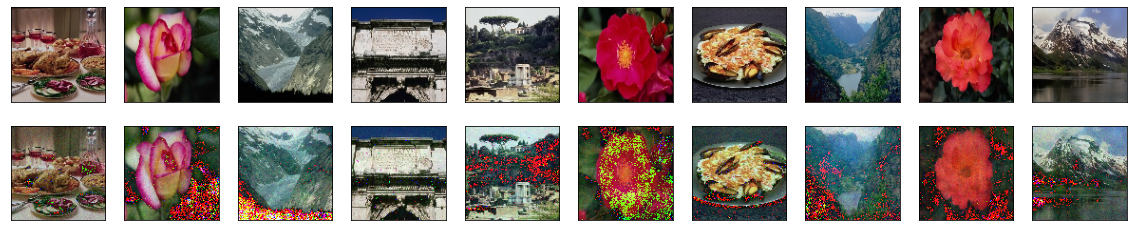

In [ ]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(train_images[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_RGB[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Try to sperate RGB image to 3 domain trained speratly lead to better data loss and noisy image but more related to image than before.

I think if we have a more dataset we could have better images.

---

# 1- AutoEncoder (rest of hidden Layer using R-G-B Models)

We will use the previous R-G_B Model and try to extract features 

Second Hidden layer:

In [ ]:
#get Encoded images after 1st hidden layer
train_encoded_imgs_1R = encoder_1R.predict(train_images[:,:,:,0])
train_encoded_imgs_1G = encoder_1G.predict(train_images[:,:,:,1])
train_encoded_imgs_1B = encoder_1B.predict(train_images[:,:,:,2])

Valid_encoded_imgs_1R = encoder_1R.predict(validate_images[:,:,:,0])
Valid_encoded_imgs_1G = encoder_1G.predict(validate_images[:,:,:,1])
Valid_encoded_imgs_1B = encoder_1B.predict(validate_images[:,:,:,2])

In [ ]:
#

encoding_dim_2 =  encoding_dim_1/4  # 100 * 100 * /2 floats -> compression of factor 2

#RED
# This is our input image
input_img_2R = keras.Input(shape=(int(encoding_dim_1),))
# "encoded" is the encoded representation of the input
encoded_2R = layers.Dense(encoding_dim_2, activation=tf.keras.layers.ReLU(negative_slope=1.0), kernel_regularizer=l2(0.0), bias_regularizer=l2(0))(input_img_2R)
# "decoded" is the lossy reconstruction of the input
decoded_2R = layers.Dense(Input_size_RGB, activation='linear')(encoded_2R)
decoded_2R = layers.Reshape((IMG_SIZE[0],IMG_SIZE[1]))(decoded_2R)
# This model maps an input to its reconstruction
autoencoder_2R = keras.Model(input_img_2R, decoded_2R)
autoencoder_2R.summary()

#Green
input_img_2G = keras.Input(shape=int(encoding_dim_1))
# "encoded" is the encoded representation of the input
encoded_2G = layers.Dense(encoding_dim_2, activation=tf.keras.layers.ReLU(negative_slope=1.0), kernel_regularizer=l2(0.0), bias_regularizer=l2(0))(input_img_2G)
# "decoded" is the lossy reconstruction of the input
decoded_2G = layers.Dense(Input_size_RGB, activation='linear')(encoded_2G)
decoded_2G= layers.Reshape((IMG_SIZE[0],IMG_SIZE[1]))(decoded_2G)
# This model maps an input to its reconstruction
autoencoder_2G = keras.Model(input_img_2G, decoded_2G)
autoencoder_2G.summary()


#Blue
input_img_2B = keras.Input(shape=int(encoding_dim_1))
# "encoded" is the encoded representation of the input
encoded_2B = layers.Dense(encoding_dim_2, activation=tf.keras.layers.ReLU(negative_slope=1.0), kernel_regularizer=l2(0.0), bias_regularizer=l2(0))(input_img_2B)
# "decoded" is the lossy reconstruction of the input
decoded_2B = layers.Dense(Input_size_RGB, activation='linear')(encoded_2B)
decoded_2B = layers.Reshape((IMG_SIZE[0],IMG_SIZE[1]))(decoded_2B)
# This model maps an input to its reconstruction
autoencoder_2B = keras.Model(input_img_2B, decoded_2B)
autoencoder_2B.summary()


Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 1250)]            0         
_________________________________________________________________
dense_18 (Dense)             (None, 312)               390312    
_________________________________________________________________
dense_19 (Dense)             (None, 10000)             3130000   
_________________________________________________________________
reshape_7 (Reshape)          (None, 100, 100)          0         
Total params: 3,520,312
Trainable params: 3,520,312
Non-trainable params: 0
_________________________________________________________________
Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 1250)]            0         
______________________________

In [ ]:
autoencoder_2R.compile(optimizer= "adam", loss=tf.keras.losses.MeanSquaredError(),metrics= ['accuracy'])
autoencoder_2R.save_weights('autoencoder_2R.h5')
#green
autoencoder_2G.compile(optimizer= "adam", loss=tf.keras.losses.MeanSquaredError(),metrics= ['accuracy'])
autoencoder_2G.save_weights('autoencoder_2G.h5')
#Blue
autoencoder_2B.compile(optimizer= "adam", loss=tf.keras.losses.MeanSquaredError(),metrics= ['accuracy'])
autoencoder_2B.save_weights('autoencoder_2B.h5')

In [ ]:
# This model maps an input to its encoded representation
encoder_2R = keras.Model(input_img_2R, encoded_2R)
encoder_2G = keras.Model(input_img_2G, encoded_2G)
encoder_2B = keras.Model(input_img_2B, encoded_2B)

In [ ]:
autoencoder_2R.load_weights('autoencoder_2R.h5')
autoencoder_2R.fit(x= train_encoded_imgs_1R, y= train_images[:,:,:,0],
                epochs=100,
                batch_size=10,
                shuffle=True,
                validation_data=(Valid_encoded_imgs_1R,validate_images[:,:,:,0]))


autoencoder_2G.load_weights('autoencoder_2G.h5')
autoencoder_2G.fit(x= train_encoded_imgs_1G, y= train_images[:,:,:,1],
                epochs=100,
                batch_size=10,
                shuffle=True,
                validation_data=(Valid_encoded_imgs_1G,validate_images[:,:,:,1]))


autoencoder_2B.load_weights('autoencoder_2B.h5')
autoencoder_2B.fit(x= train_encoded_imgs_1B, y= train_images[:,:,:,2],
                epochs=100,
                batch_size=10,
                shuffle=True,
                validation_data=(Valid_encoded_imgs_1B,validate_images[:,:,:,2]))

Epoch 1/100
6/6 [==============================] - 0s 30ms/step - loss: 0.1862 - accuracy: 0.0115 - val_loss: 0.0777 - val_accuracy: 0.0165
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0779 - accuracy: 0.0213 - val_loss: 0.0631 - val_accuracy: 0.0085
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0542 - accuracy: 0.0256 - val_loss: 0.0503 - val_accuracy: 0.0145
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0443 - accuracy: 0.0395 - val_loss: 0.0682 - val_accuracy: 0.0205
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0434 - accuracy: 0.0516 - val_loss: 0.0563 - val_accuracy: 0.0140
Epoch 6/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0300 - accuracy: 0.0645 - val_loss: 0.0454 - val_accuracy: 0.0125
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0234 - accuracy: 0.0737 - val_loss: 0.0445 - val_accuracy: 0.0155
Epoch 8/100
6/6 [========

In [ ]:
# Note that we take them from the *test* set
train_decoded_imgs_2RGB =  np.zeros(train_images.shape, 'uint8')
#print(np.amax(Valid_encoded_imgs_1R),np.amax(Valid_encoded_imgs_1G),np.amax(Valid_encoded_imgs_1B))
print(train_decoded_imgs_2RGB.shape)
train_decoded_imgs_2RGB[:,:,:,0] = autoencoder_2R.predict(train_encoded_imgs_1R)*255  #train_images
train_decoded_imgs_2RGB[:,:,:,1] = autoencoder_2G.predict(train_encoded_imgs_1G) * 255 
train_decoded_imgs_2RGB[:,:,:,2] = autoencoder_2B.predict(train_encoded_imgs_1B) *255
#decoded_imgs_RGB = np.dstack((decoded_imgs_R,decoded_imgs_G,decoded_imgs_B))
print(train_decoded_imgs_2RGB.shape)

# Note that we take them from the *test* set
validate_decoded_imgs_2RGB =  np.zeros(validate_images.shape, 'uint8')
print(np.amax(Valid_encoded_imgs_1R),np.amax(Valid_encoded_imgs_1G),np.amax(Valid_encoded_imgs_1B))
print(validate_decoded_imgs_2RGB.shape)
validate_decoded_imgs_2RGB[:,:,:,0] = autoencoder_2R.predict(Valid_encoded_imgs_1R)*255  #train_images
validate_decoded_imgs_2RGB[:,:,:,1] = autoencoder_2G.predict(Valid_encoded_imgs_1G) * 255 
validate_decoded_imgs_2RGB[:,:,:,2] = autoencoder_2B.predict(Valid_encoded_imgs_1B) *255
#decoded_imgs_RGB = np.dstack((decoded_imgs_R,decoded_imgs_G,decoded_imgs_B))
print(validate_decoded_imgs_2RGB.shape)

(60, 100, 100, 3)
(60, 100, 100, 3)
5.1286135 5.175413 2.9145792
(20, 100, 100, 3)
(20, 100, 100, 3)


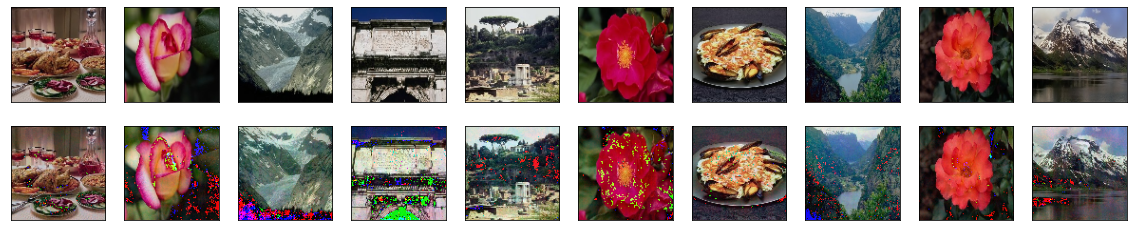

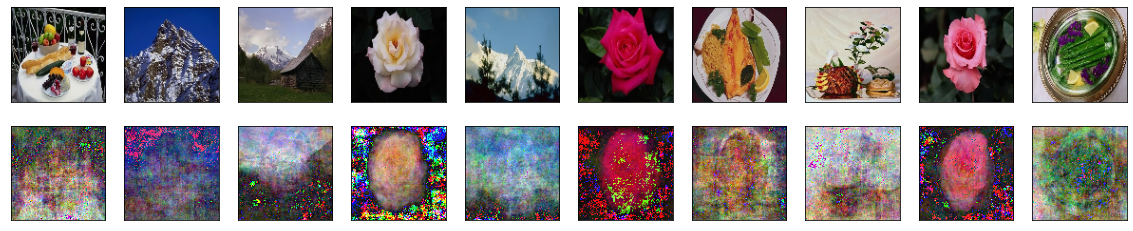

In [ ]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(train_images[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(train_decoded_imgs_2RGB[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(validate_images[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(validate_decoded_imgs_2RGB[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#Third Hidden layer:

In [ ]:
#get Encoded images after 1st hidden layer
train_encoded_imgs_2R = encoder_2R.predict(train_encoded_imgs_1R)
train_encoded_imgs_2G = encoder_2G.predict(train_encoded_imgs_1G)
train_encoded_imgs_2B = encoder_2B.predict(train_encoded_imgs_1B)

Valid_encoded_imgs_2R = encoder_2R.predict(Valid_encoded_imgs_1R)
Valid_encoded_imgs_2G = encoder_2G.predict(Valid_encoded_imgs_1G)
Valid_encoded_imgs_2B = encoder_2B.predict(Valid_encoded_imgs_1B)

In [ ]:
#
l1=0.0
l2=0.0

encoding_dim_3 =  encoding_dim_2/4  # 100 * 100 * /2 floats -> compression of factor 2
print(encoding_dim_3)

#RED
# This is our input image
input_img_3R = keras.Input(shape=(int(encoding_dim_2),))
# "encoded" is the encoded representation of the input
encoded_3R = layers.Dense(int(encoding_dim_3), activation=tf.keras.layers.ReLU(negative_slope=1.0))(input_img_3R)
# "decoded" is the lossy reconstruction of the input
decoded_3R = layers.Dense(Input_size_RGB, activation='linear')(encoded_3R)
decoded_3R = layers.Reshape((IMG_SIZE[0],IMG_SIZE[1]))(decoded_3R)
# This model maps an input to its reconstruction
autoencoder_3R = keras.Model(input_img_3R, decoded_3R)
autoencoder_3R.summary()

#Green
# This is our input image
input_img_3G = keras.Input(shape=(int(encoding_dim_2),))
# "encoded" is the encoded representation of the input
encoded_3G = layers.Dense(encoding_dim_3, activation=tf.keras.layers.ReLU(negative_slope=1.0))(input_img_3G)
# "decoded" is the lossy reconstruction of the input
decoded_3G = layers.Dense(Input_size_RGB, activation='linear')(encoded_3G)
decoded_3G = layers.Reshape((IMG_SIZE[0],IMG_SIZE[1]))(decoded_3G)
# This model maps an input to its reconstruction
autoencoder_3G = keras.Model(input_img_3G, decoded_3G)
autoencoder_3G.summary()


#Blue
# This is our input image
input_img_3B = keras.Input(shape=(int(encoding_dim_2),))
# "encoded" is the encoded representation of the input
encoded_3B = layers.Dense(encoding_dim_3, activation=tf.keras.layers.ReLU(negative_slope=1.0))(input_img_3B)
# "decoded" is the lossy reconstruction of the input
decoded_3B = layers.Dense(Input_size_RGB, activation='linear')(encoded_3B)
decoded_3B = layers.Reshape((IMG_SIZE[0],IMG_SIZE[1]))(decoded_3B)
# This model maps an input to its reconstruction
autoencoder_3B = keras.Model(input_img_3B, decoded_3B)
autoencoder_3B.summary()



78.125
Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 312)]             0         
_________________________________________________________________
dense_24 (Dense)             (None, 78)                24414     
_________________________________________________________________
dense_25 (Dense)             (None, 10000)             790000    
_________________________________________________________________
reshape_10 (Reshape)         (None, 100, 100)          0         
Total params: 814,414
Trainable params: 814,414
Non-trainable params: 0
_________________________________________________________________
Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 312)]             0         
___________________________

In [ ]:
autoencoder_3R.compile(optimizer= "adam", loss=tf.keras.losses.MeanSquaredError(),metrics= ['accuracy'])
autoencoder_3R.save_weights('autoencoder_3R.h5')
#green
autoencoder_3G.compile(optimizer= "adam", loss=tf.keras.losses.MeanSquaredError(),metrics= ['accuracy'])
autoencoder_3G.save_weights('autoencoder_3G.h5')
#Blue
autoencoder_3B.compile(optimizer= "adam", loss=tf.keras.losses.MeanSquaredError(),metrics= ['accuracy'])
autoencoder_3B.save_weights('autoencoder_3B.h5')

In [ ]:
# This model maps an input to its encoded representation
encoder_3R = keras.Model(input_img_3R, encoded_3R)
encoder_3G = keras.Model(input_img_3G, encoded_3G)
encoder_3B = keras.Model(input_img_3B, encoded_3B)

In [ ]:
autoencoder_3R.load_weights('autoencoder_3R.h5')
autoencoder_3R.fit(x= train_encoded_imgs_2R, y= train_images[:,:,:,0],
                epochs=50,
                batch_size=10,
                shuffle=True,
                validation_data=(Valid_encoded_imgs_2R,validate_images[:,:,:,0]))


autoencoder_3G.load_weights('autoencoder_3G.h5')
autoencoder_3G.fit(x= train_encoded_imgs_2G, y= train_images[:,:,:,1],
                epochs=50,
                batch_size=10,
                shuffle=True,
                validation_data=(Valid_encoded_imgs_2G,validate_images[:,:,:,1]))


autoencoder_3B.load_weights('autoencoder_3B.h5')
autoencoder_3B.fit(x= train_encoded_imgs_2B, y= train_images[:,:,:,2],
                epochs=50,
                batch_size=10,
                shuffle=True,
                validation_data=(Valid_encoded_imgs_2B,validate_images[:,:,:,2]))

Epoch 1/50
6/6 [==============================] - 0s 28ms/step - loss: 0.2167 - accuracy: 0.0135 - val_loss: 0.0929 - val_accuracy: 0.0115
Epoch 2/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0853 - accuracy: 0.0175 - val_loss: 0.0766 - val_accuracy: 0.0115
Epoch 3/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0664 - accuracy: 0.0214 - val_loss: 0.0613 - val_accuracy: 0.0165
Epoch 4/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0549 - accuracy: 0.0233 - val_loss: 0.0567 - val_accuracy: 0.0185
Epoch 5/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0463 - accuracy: 0.0266 - val_loss: 0.0511 - val_accuracy: 0.0180
Epoch 6/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0407 - accuracy: 0.0365 - val_loss: 0.0462 - val_accuracy: 0.0145
Epoch 7/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0334 - accuracy: 0.0446 - val_loss: 0.0456 - val_accuracy: 0.0140
Epoch 8/50
6/6 [=================

In [ ]:
# Note that we take them from the *test* set
train_decoded_imgs_3RGB =  np.zeros(train_images.shape, 'uint8')
#print(np.amax(Valid_encoded_imgs_1R),np.amax(Valid_encoded_imgs_1G),np.amax(Valid_encoded_imgs_1B))
print(train_decoded_imgs_3RGB.shape)
train_decoded_imgs_3RGB[:,:,:,0] = autoencoder_3R.predict(train_encoded_imgs_2R)*255  #train_images
train_decoded_imgs_3RGB[:,:,:,1] = autoencoder_3G.predict(train_encoded_imgs_2G) * 255 
train_decoded_imgs_3RGB[:,:,:,2] = autoencoder_3B.predict(train_encoded_imgs_2B) *255
#decoded_imgs_RGB = np.dstack((decoded_imgs_R,decoded_imgs_G,decoded_imgs_B))
print(train_decoded_imgs_3RGB.shape)

# Note that we take them from the *test* set
validate_decoded_imgs_3RGB =  np.zeros(validate_images.shape, 'uint8')
#print(np.amax(Valid_encoded_imgs_1R),np.amax(Valid_encoded_imgs_1G),np.amax(Valid_encoded_imgs_1B))
print(validate_decoded_imgs_3RGB.shape)
validate_decoded_imgs_2RGB[:,:,:,0] = autoencoder_3R.predict(Valid_encoded_imgs_2R)*255  #train_images
validate_decoded_imgs_2RGB[:,:,:,1] = autoencoder_3G.predict(Valid_encoded_imgs_2G) * 255 
validate_decoded_imgs_2RGB[:,:,:,2] = autoencoder_3B.predict(Valid_encoded_imgs_2B) *255
#decoded_imgs_RGB = np.dstack((decoded_imgs_R,decoded_imgs_G,decoded_imgs_B))
print(validate_decoded_imgs_3RGB.shape)

(60, 100, 100, 3)
(60, 100, 100, 3)
(20, 100, 100, 3)
(20, 100, 100, 3)


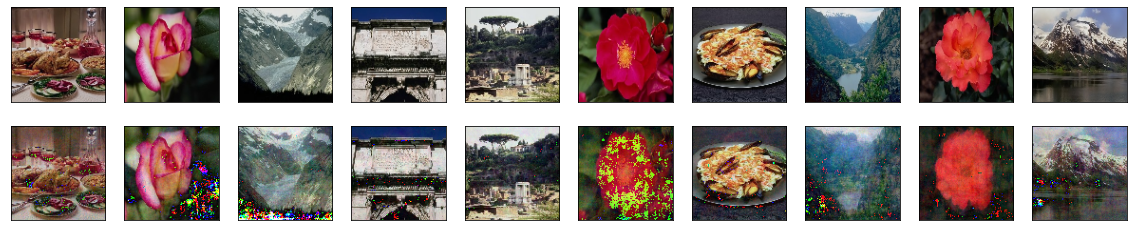

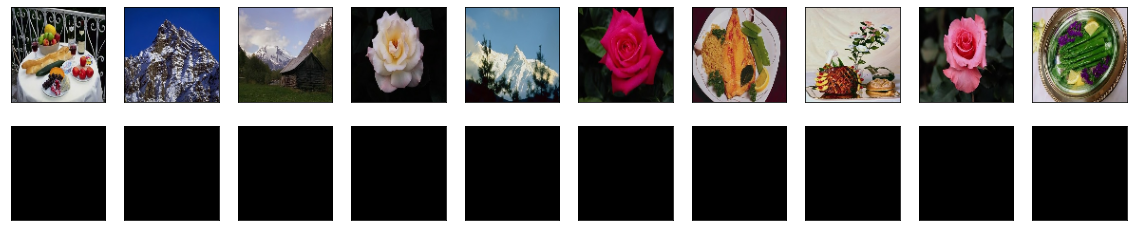

In [ ]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(train_images[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(train_decoded_imgs_3RGB[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(validate_images[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(validate_decoded_imgs_3RGB[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()